In [1]:
from preprocessing import *

/home/sam/anaconda3/envs/YOLOv5/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision import transforms
import torchvision

#### Old Cell Bounding Box Stuff

In [3]:
temp_cell_bbox = []
one_cell_indices = []

for i in range(len(boxes_list)):
    if len(boxes_list[i]) == 1:
        temp_cell_bbox.append(boxes_list[i])
        one_cell_indices.append(i)

### Get 12 different one cell samples

In [4]:
one_cell_images = []

j = 0

for i in range(len(images_path)):
    temp_path = int(images_path[i][12:-4])
    if temp_path == one_cell_indices[j]:
        one_cell_images.append(images[i])
        j += 1
        if j == len(one_cell_indices):
            break

In [5]:
def tensor_to_tuple(tensor):
    return tuple(tensor.tolist()[0])

In [6]:
#print(len(cell_bbox), len(one_cell_images))

In [7]:
cropped_images = []

for i in range(len(one_cell_images)):
    cropped_images.append(Image.fromarray(one_cell_images[i]).crop(tuple(temp_cell_bbox[i].tolist()[0])))
    #print() #.crop(cell_bbox[i].tolist())
    #print(cell_bbox[i].tolist(), i)

##### List of sample single-cell images

In [8]:
cropped_images.insert(0, cropped_images[0])
cropped_images.insert(0, cropped_images[2])
cropped_images.insert(0, cropped_images[3])
cropped_images.insert(0, cropped_images[4])
cropped_images.insert(0, cropped_images[6])
cropped_images.insert(0, cropped_images[7])
cropped_images.insert(0, cropped_images[8])
cropped_images.insert(0, cropped_images[9])
cropped_images.insert(0, cropped_images[10])
cropped_images.insert(0, cropped_images[11])

In [9]:
for i in range(len(cropped_images) - 10):
    cropped_images.pop()

In [10]:
print(cropped_images[0].size[1])

34


##### Make it so that cell_bbox is a list of the bounding boxes where the numbers correspond to the corners of its corresponding cropped_image.

In [11]:
cell_bbox = np.empty([10,4])

for i in range(len(cropped_images)):
    cell_bbox[i] = [0, 0, cropped_images[i].size[0]-1, cropped_images[i].size[1]-1]

In [12]:
print(cell_bbox)

[[ 0.  0. 32. 33.]
 [ 0.  0. 32. 33.]
 [ 0.  0. 32. 33.]
 [ 0.  0. 32. 33.]
 [ 0.  0. 32. 33.]
 [ 0.  0. 32. 33.]
 [ 0.  0. 70. 48.]
 [ 0.  0. 70. 48.]
 [ 0.  0. 70. 48.]
 [ 0.  0. 32. 32.]]


### Testing bounding box on one image

In [13]:
print(type(cell_bbox))

<class 'numpy.ndarray'>


In [14]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [15]:
bb_test_image = transform(cropped_images[0])
# Set bb_test_box to cell_bbox[0] converted to a pytorch tensor
bb_test_box = torch.tensor([cell_bbox[0]])
bb_test_box = torch.Tensor(bb_test_box)

print(type(boxes_list[0]))
print(type(bb_test_box))
print(boxes_list[0])
print(bb_test_box)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([[438.,   2., 471.,  35.]])
tensor([[ 0.,  0., 32., 33.]], dtype=torch.float64)


/tmp/ipykernel_5512/2569431714.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  bb_test_box = torch.tensor([cell_bbox[0]])


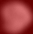

In [16]:
bb_test = draw_bounding_boxes(bb_test_image, bb_test_box, width=0, colors="red", fill="False")

bb_test = torchvision.transforms.ToPILImage()(bb_test)

bb_test.show()

In [17]:
import random

In [18]:
threshold = 0.1

for i in range(len(cropped_images)):
    cropped_images[i] = np.array(cropped_images[i]) > 50

In [19]:
def black_to_alpha(img):
    img = Image.fromarray(img)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    
    return img

In [20]:
#for i in range(len(cropped_images)):
    #cropped_images[i] = black_to_alpha(np.array(cropped_images[i]))

In [21]:
# Write an artificial data augmentation functions to randomly flip the image and bounding box
"""def flip_image(image, box):
    # Flip the image
    image = transforms.functional.hflip(image)
    # Flip the bounding box
    box[:, 0] = 1 - box[:, 0]
    # Swap the x_min and x_max values
    box[:, [0, 2]] = box[:, [2, 0]]
    return image, box"""

'def flip_image(image, box):\n    # Flip the image\n    image = transforms.functional.hflip(image)\n    # Flip the bounding box\n    box[:, 0] = 1 - box[:, 0]\n    # Swap the x_min and x_max values\n    box[:, [0, 2]] = box[:, [2, 0]]\n    return image, box'

In [22]:
for i in range(len(cropped_images)):
    cropped_images[i] = Image.fromarray(cropped_images[i])

In [23]:
# Convert all cropped_images to RGB
for i in range(len(cropped_images)):
    cropped_images[i] = cropped_images[i].convert("RGB")

In [24]:
# Convert all cropped_images to pytorch tensors
for i in range(len(cropped_images)):
    cropped_images[i] = transform(cropped_images[i])

In [25]:
# Convert all cell_bbox to pytorch tensors
for i in range(len(cell_bbox)):
    cell_bbox[i] = torch.from_numpy(cell_bbox[i])

In [26]:
print(torch.Tensor([cell_bbox[1]]))

tensor([[ 0.,  0., 32., 33.]])


In [27]:
print(cell_bbox[0])

[ 0.  0. 32. 33.]


In [28]:
print(torch.Tensor(cell_bbox.tolist())[0])

tensor([ 0.,  0., 32., 33.])


In [29]:
cell_bbox = torch.Tensor(cell_bbox.tolist())

In [30]:
print(cell_bbox[0].unsqueeze(0))

tensor([[ 0.,  0., 32., 33.]])


In [31]:
for i in range(10):
    cell_bbox[i].unsqueeze(0)

In [32]:
print(cell_bbox[0])

tensor([ 0.,  0., 32., 33.])


In [33]:
box = cell_bbox[0].unsqueeze(0)
print(box)

tensor([[ 0.,  0., 32., 33.]])


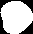

In [34]:
caca = torchvision.transforms.ToPILImage()(cropped_images[0])
caca.show()

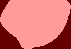

In [35]:
# Plot cropped_images[0] with bounding box
bb_test_image = cropped_images[7]
bb_test_box = cell_bbox[7].unsqueeze(0)
bb_test = draw_bounding_boxes(bb_test_image, bb_test_box, width=0, colors="red", fill="False")
bb_test = torchvision.transforms.ToPILImage()(bb_test)
bb_test.show()

In [36]:
test_image = draw_bounding_boxes(cropped_images[0], box, colors="red", fill="False")
test_image = torchvision.transforms.ToPILImage()(test_image)

test_image.save("artificial_images/artificial_image_" + str(i) + ".png")


In [37]:
to_pil = torchvision.transforms.ToPILImage()

In [38]:
"""temp_image = Image.new('RGB', (IMAGE_WIDTH, IMAGE_HEIGHT), color=(0,0,0,0))
randx = random.randint(0, IMAGE_WIDTH-32)
randy = random.randint(0, IMAGE_HEIGHT-40)

for i in range(10):
    rand_number = random.randint(0, len(cropped_images)-1)
    temp_image.paste(to_pil(cropped_images[rand_number]), (randx, randy))
    temp_image = transform(temp_image)
    temp_image = draw_bounding_boxes(temp_image, cell_bbox[rand_number].unsqueeze(0), colors="red", fill="False")
temp_image = torchvision.transforms.ToPILImage()(temp_image)
temp_image.save("artificial_images/artificial_image_" + str(i) + ".png")"""

'temp_image = Image.new(\'RGB\', (IMAGE_WIDTH, IMAGE_HEIGHT), color=(0,0,0,0))\nrandx = random.randint(0, IMAGE_WIDTH-32)\nrandy = random.randint(0, IMAGE_HEIGHT-40)\n\nfor i in range(10):\n    rand_number = random.randint(0, len(cropped_images)-1)\n    temp_image.paste(to_pil(cropped_images[rand_number]), (randx, randy))\n    temp_image = transform(temp_image)\n    temp_image = draw_bounding_boxes(temp_image, cell_bbox[rand_number].unsqueeze(0), colors="red", fill="False")\ntemp_image = torchvision.transforms.ToPILImage()(temp_image)\ntemp_image.save("artificial_images/artificial_image_" + str(i) + ".png")'

In [39]:
print(torch.zeros(0))

tensor([])


In [40]:
all_boxes = torch.zeros(0)
all

<function all(iterable, /)>

In [41]:
print(cell_bbox)

tensor([[ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 32., 32.]])


In [42]:
temp_ting = torch.clone(cell_bbox[0])
print(id(temp_ting), id(cell_bbox[0]))
print(id(temp_ting) == id(cell_bbox[0]))
print(temp_ting, cell_bbox[0])

140620020592128 140620020591008
False
tensor([ 0.,  0., 32., 33.]) tensor([ 0.,  0., 32., 33.])


In [43]:
print(temp_ting)

tensor([ 0.,  0., 32., 33.])


In [44]:
print(cell_bbox[0])

tensor([ 0.,  0., 32., 33.])


In [45]:
id(temp_ting)

140620020592128

In [46]:
id(cell_bbox[0])

140620020603776

In [60]:
# Create 100 images with randomly selected cropped_images and cell_bbox converted to pytorch tensors
# Use the draw_bounding_boxes function to draw the bounding box on the image
# Save the image to a folder called "artificial_images"

IMAGE_WIDTH = 696
IMAGE_HEIGHT = 520

boxes = []

# Make 100 randomly generated images
for i in range(100):
    temp_image = Image.new('RGB', (IMAGE_WIDTH, IMAGE_HEIGHT), color=(0,0,0,0))
    all_boxes = torch.zeros(0)
    #print("Uno " + str(type(temp_image)))
    
    # Paste 10 cropped_images onto temp_image
    for j in range(10):

        random.seed(random.randint(0, 100000))
            
        randx = random.randint(0, IMAGE_WIDTH-32)
        randy = random.randint(0, IMAGE_HEIGHT-40)  

        rand_number = random.randint(0, len(cropped_images)-1)

        temp_image.paste(to_pil(cropped_images[rand_number]), (randx, randy))

        # Add randx and randy to the cell_bbox coordinates
        temp_box = torch.clone(cell_bbox[rand_number].unsqueeze(0))
        #print(temp_box)
        temp_box[:, 0] = temp_box[:, 0] + randx
        temp_box[:, 1] = temp_box[:, 1] + randy
        temp_box[:, 2] = temp_box[:, 2] + randx
        temp_box[:, 3] = temp_box[:, 3] + randy

        #print(temp_box[0, 3])

        all_boxes = torch.cat((all_boxes, temp_box))

        boxes.append(all_boxes)

    #print(all_boxes)

    #torch.reshape(all_boxes, (10, 4))

    # enumerate through all_boxes
    # for each box, add the x and y coordinates of the top left corner of the image
    # to the x and y coordinates of the box
    # then save the image

    #print(all_boxes)

    bbox_temp_image = transform(temp_image) 
    bbox_temp_image = draw_bounding_boxes(bbox_temp_image, all_boxes, colors="red", fill="False")

    #print(i, str(type(temp_image)))

    bbox_temp_image = torchvision.transforms.ToPILImage()(bbox_temp_image)
    #temp_image = torchvision.transforms.ToPILImage()(temp_image)
    temp_image.save("artificial_images/artificial_image_" + str(i) + ".png")
    bbox_temp_image.save("artificial_bboxes/artificial_bbox_" + str(i) + ".png")



In [ ]:
print(boxes)

In [62]:
write_box_info_to_file(boxes)

UPDATE


In [48]:
print(cell_bbox)

tensor([[ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 32., 33.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 70., 48.],
        [ 0.,  0., 32., 32.]])


In [49]:
temp_box = cell_bbox[rand_number].unsqueeze(0)
temp_box[:, 0] = temp_box[:, 0] + randx
temp_box[:, 1] = temp_box[:, 1] + randy
temp_box[:, 2] = temp_box[:, 2] + randx
temp_box[:, 3] = temp_box[:, 3] + randy

In [50]:
test_array = torch.zeros(0)
test_array = torch.cat((test_array, torch.Tensor([1,2,3,4]).unsqueeze(0)))
test_array = torch.cat((test_array, torch.Tensor([1,2,3,4]).unsqueeze(0)))
test_array = torch.cat((test_array, torch.Tensor([1,2,3,4]).unsqueeze(0)))
test_array

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])

In [51]:
print(type(cell_bbox[rand_number].unsqueeze(0)), cell_bbox[rand_number].unsqueeze(0))
print(type(all_boxes[0]), all_boxes[0])

<class 'torch.Tensor'> tensor([[151., 249., 183., 282.]])
<class 'torch.Tensor'> tensor([446., 153., 478., 185.])


<class 'torch.Tensor'>


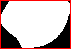

In [52]:
# Claca equals cropped_images[0] converted to a PIL image
rand_number = random.randint(0, len(cropped_images)-1)

claca = cropped_images[rand_number]
print(type(claca))
claca = draw_bounding_boxes(claca, cell_bbox[rand_number].unsqueeze(0), colors="red")

claca = torchvision.transforms.ToPILImage()(claca)
claca.show()

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


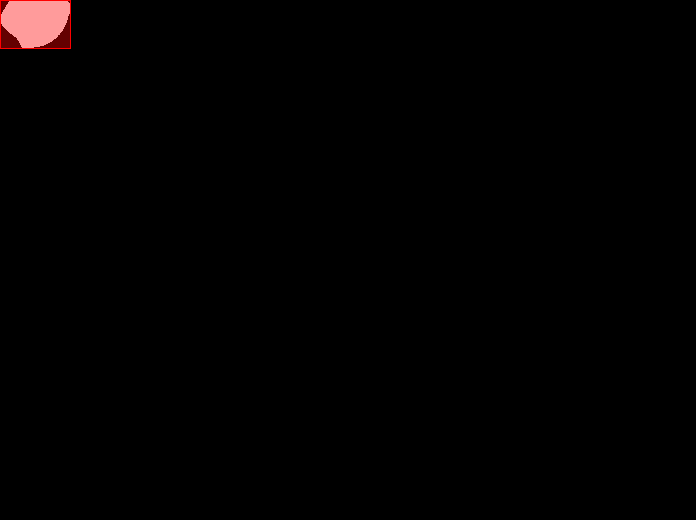

In [53]:
blaka = Image.new('RGB', (IMAGE_WIDTH, IMAGE_HEIGHT), color=(0,0,0,0))
blaka_image = torchvision.transforms.ToPILImage()(cropped_images[7])
print(type(blaka_image))
blaka.paste(blaka_image, (0, 0))
print(type(blaka))
# Convert blaka to a pytorch tensor
blaka = transform(blaka)

blaka = draw_bounding_boxes(blaka, cell_bbox[7].unsqueeze(0), colors="red", fill="False")
blaka = torchvision.transforms.ToPILImage()(blaka)
blaka.show()

In [54]:
print(cell_bbox[random.randint(0, len(cropped_images)-1)].unsqueeze(0))

tensor([[ 0.,  0., 32., 33.]])


In [55]:
# Create a new folder called "artificial_images"
# Create a new folder called "artificial_images/annotations"
# Create a new folder called "artificial_images/images"

# Create a new file called "artificial_images/annotations/annotations.csv"
# Write the header "image_name,x_min,y_min,x_max,y_max" to the file

# Create a new file called "artificial_images/images/images.csv"
# Write the header "image_name" to the file

In [56]:
# Create 100 images with randomly selected cropped_images and cell_bbox
# Use the draw_bounding_boxes function to draw the bounding box on the image
# Save the image to a folder called "artificial_images"

"""for i in range(100):
    rand_num = random.randint(0, 9)
    temp_image = cropped_images[rand_num]
    temp_box = cell_bbox[rand_num]

    temp_image = draw_bounding_boxes(temp_image, temp_box, width=0, colors="red", fill="False")
    temp_image = torchvision.transforms.ToPILImage()(temp_image)
    temp_image.save("artificial_images/" + str(i) + ".png")"""


'for i in range(100):\n    rand_num = random.randint(0, 9)\n    temp_image = cropped_images[rand_num]\n    temp_box = cell_bbox[rand_num]\n\n    temp_image = draw_bounding_boxes(temp_image, temp_box, width=0, colors="red", fill="False")\n    temp_image = torchvision.transforms.ToPILImage()(temp_image)\n    temp_image.save("artificial_images/" + str(i) + ".png")'